# LLM Vote Ensemble Variance

This notebook analyzes the LLM vote ensemble's variance for each dataset across multiple runs.

<hr>

Import packages.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter
from src.utils.path import resolve_results_path
from tqdm import tqdm

Load the raw results for all datasets and runs into a single DataFrame.

In [ ]:
alias = "llm_vote_ensemble"
results_dir = resolve_results_path() / alias
csv_files = list(results_dir.rglob("*.csv"))

kwargs = {
    "desc": "Reading CSVs",
    "total": len(csv_files),
    "unit": "file",
}

df = pd.concat(
    [pd.read_csv(file) for file in tqdm(csv_files, **kwargs)],
    ignore_index=True,
)

print(f"Loaded {len(df)} rows from {len(csv_files)} files.")
df.head()

Reading CSVs: 100%|██████████| 291/291 [00:00<00:00, 1219.36file/s]

Loaded 1034 rows from 291 files.


,dataset,model,eval_metrics/MSE[mean],eval_metrics/MSE[0.5],eval_metrics/MAE[0.5],eval_metrics/MASE[0.5],eval_metrics/MAPE[0.5],eval_metrics/sMAPE[0.5],eval_metrics/MSIS,eval_metrics/RMSE[mean],eval_metrics/NRMSE[mean],eval_metrics/ND[0.5],eval_metrics/mean_weighted_sum_quantile_loss,domain,num_variates,model_list,weight_list,source_path
0,us_births/M/short,TimeCopilot_LLM_Vote,6.760470e+07,6.760470e+07,6698.290580,0.758349,0.020557,0.020870,4.680522,8222.207853,0.025538,0.020805,0.015724,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.5438, 0.0, 0.4562]",all_data_combined.csv
1,us_births/M/short,TimeCopilot_LLM_Vote,6.560254e+07,6.560254e+07,6475.992782,0.733170,0.019874,0.020177,4.679878,8099.539220,0.025157,0.020114,0.015249,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.5131, 0.0, 0.4869]",all_data_combined.csv
2,us_births/M/short,TimeCopilot_LLM_Vote,6.456024e+07,6.456024e+07,6590.303254,0.746209,0.020255,0.020551,4.479227,8034.938535,0.024956,0.020469,0.015335,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.4923, 0.0, 0.5077]",all_data_combined.csv
3,us_births/W/short,TimeCopilot_LLM_Vote,1.621474e+06,1.621474e+06,981.163111,0.892352,0.013319,0.013367,6.063137,1273.371072,0.017286,0.013319,0.010582,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.8934, 0.0, 0.1066]",all_data_combined.csv
4,us_births/W/short,TimeCopilot_LLM_Vote,1.634336e+06,1.634336e+06,982.827950,0.893894,0.013350,0.013399,6.292817,1278.411374,0.017354,0.013342,0.010669,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.9284, 0.0, 0.0716]",all_data_combined.csv


Create a new CSV file only containing each dataset's most recent run.

Create a histogram showing the number of runs each dataset has.

Total datasets: 97
Min rows: 6
Max rows: 12
Mean rows: 10.66
Median rows: 12.0


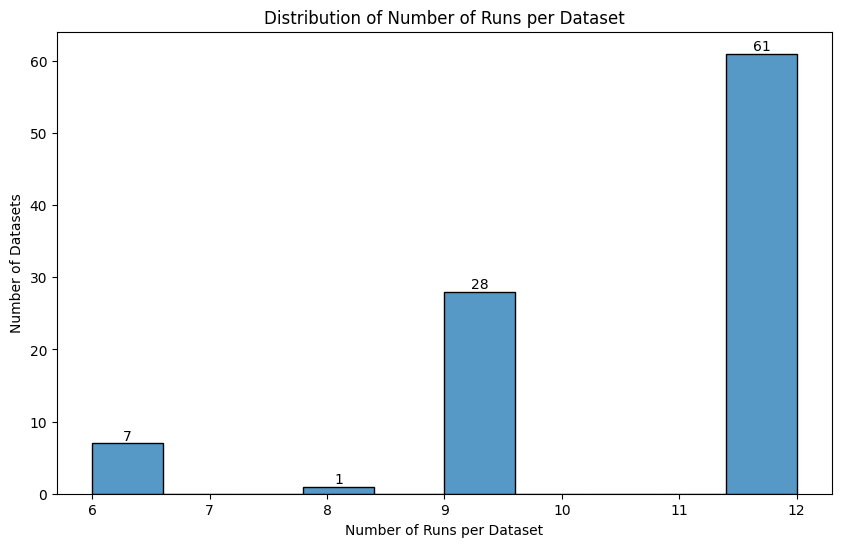

In [34]:
group_sizes = df.groupby("dataset").size()

print(f"Total datasets: {len(group_sizes)}")
print(f"Min rows: {group_sizes.min()}")
print(f"Max rows: {group_sizes.max()}")
print(f"Mean rows: {group_sizes.mean():.2f}")
print(f"Median rows: {group_sizes.median()}")

plt.figure(figsize=(10, 6))
ax = sns.histplot(group_sizes, bins=10)

# Add bar labels
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Get the x position: center of the bar
        x = patch.get_x() + patch.get_width() / 2
        y = height
        ax.text(x, y, f"{int(height)}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Number of Runs per Dataset")
plt.ylabel("Number of Datasets")
plt.title("Distribution of Number of Runs per Dataset")
plt.show()

Filter the DataFrame so each dataset contains the same number of runs.

In [35]:
min_runs = df.groupby("dataset").size().min()

# Keep the last `min_runs` runs for each dataset
grouped_df = df.groupby("dataset").tail(min_runs).reset_index(drop=True)

print(f"Min number of runs per dataset: {min_runs}")
assert len(grouped_df) == min_runs * len(grouped_df["dataset"].unique())

print(f"Number of rows: {len(grouped_df)}")
grouped_df.head()

Min number of runs per dataset: 6
Number of rows: 582


,dataset,model,eval_metrics/MSE[mean],eval_metrics/MSE[0.5],eval_metrics/MAE[0.5],eval_metrics/MASE[0.5],eval_metrics/MAPE[0.5],eval_metrics/sMAPE[0.5],eval_metrics/MSIS,eval_metrics/RMSE[mean],eval_metrics/NRMSE[mean],eval_metrics/ND[0.5],eval_metrics/mean_weighted_sum_quantile_loss,domain,num_variates,model_list,weight_list,source_path
0,temperature_rain/D/short,TimeCopilot_LLM_Vote,1.734344e+02,1.734344e+02,5.961588,1.391278,41.667030,1.439300,25.661367,13.169450,1.550392,0.701837,0.595929,Nature,1,"['Moirai', 'Sundial', 'Toto']","[0.0, 0.9055, 0.0945]",all_data_combined.csv
1,temperature_rain/D/short,TimeCopilot_LLM_Vote,1.736718e+02,1.736718e+02,5.960312,1.390573,40.721519,1.442144,25.607758,13.178461,1.551453,0.701686,0.595085,Nature,1,"['Moirai', 'Sundial', 'Toto']","[0.0, 0.9461, 0.0539]",all_data_combined.csv
2,us_births/M/short,TimeCopilot_LLM_Vote,6.760470e+07,6.760470e+07,6698.290580,0.758349,0.020557,0.020870,4.680522,8222.207853,0.025538,0.020805,0.015724,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.5438, 0.0, 0.4562]",us_births/M/short/run_0/results.csv
3,us_births/M/short,TimeCopilot_LLM_Vote,6.560254e+07,6.560254e+07,6475.992782,0.733170,0.019874,0.020177,4.679878,8099.539220,0.025157,0.020114,0.015249,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.5131, 0.0, 0.4869]",us_births/M/short/run_2/results.csv
4,us_births/M/short,TimeCopilot_LLM_Vote,6.456024e+07,6.456024e+07,6590.303254,0.746209,0.020255,0.020551,4.479227,8034.938535,0.024956,0.020469,0.015335,Healthcare,1,"['Moirai', 'Sundial', 'Toto']","[0.4923, 0.0, 0.5077]",us_births/M/short/run_1/results.csv


For each dataset, compute the variance in MASE and CRPS across runs.

In [38]:
variance_df = df.groupby("dataset").var(numeric_only=True).reset_index()
variance_df = variance_df.rename(
    columns={
        "eval_metrics/MASE[0.5]": "MASE",
        "eval_metrics/mean_weighted_sum_quantile_loss": "CRPS",
    }
)

print(f"Number of rows: {len(variance_df)}")
variance_df.head()

Number of rows: 97


,dataset,eval_metrics/MSE[mean],eval_metrics/MSE[0.5],eval_metrics/MAE[0.5],MASE,eval_metrics/MAPE[0.5],eval_metrics/sMAPE[0.5],eval_metrics/MSIS,eval_metrics/RMSE[mean],eval_metrics/NRMSE[mean],eval_metrics/ND[0.5],CRPS,num_variates
0,bitbrains_fast_storage/5T/long,4.353731e+10,4.353731e+10,4.352946,5.851062e-05,0.065517,4.725540e-06,4.343694,2133.380807,0.014899,0.000030,3.125844e-05,0.0
1,bitbrains_fast_storage/5T/medium,5.300151e+09,5.300151e+09,4.224673,2.084611e-05,0.010883,3.019553e-07,0.123846,489.632263,0.004520,0.000039,8.357168e-06,0.0
2,bitbrains_fast_storage/5T/short,2.208291e+07,2.208291e+07,0.380972,4.807721e-06,0.000555,7.462201e-07,0.008721,3.281872,0.000032,0.000004,1.487912e-06,0.0
3,bitbrains_fast_storage/H/short,1.089651e+08,1.089651e+08,0.195801,2.449896e-07,0.000055,5.247175e-07,0.000310,9.439096,0.000077,0.000002,5.375155e-07,0.0
4,bitbrains_rnd/5T/long,3.665004e+08,3.665004e+08,8.499836,1.186039e-05,0.037800,2.179400e-05,0.649788,40.479215,0.000594,0.000125,1.054939e-04,0.0


Create a histogram showing the variances in MASE and CRPS across runs for all datasets.

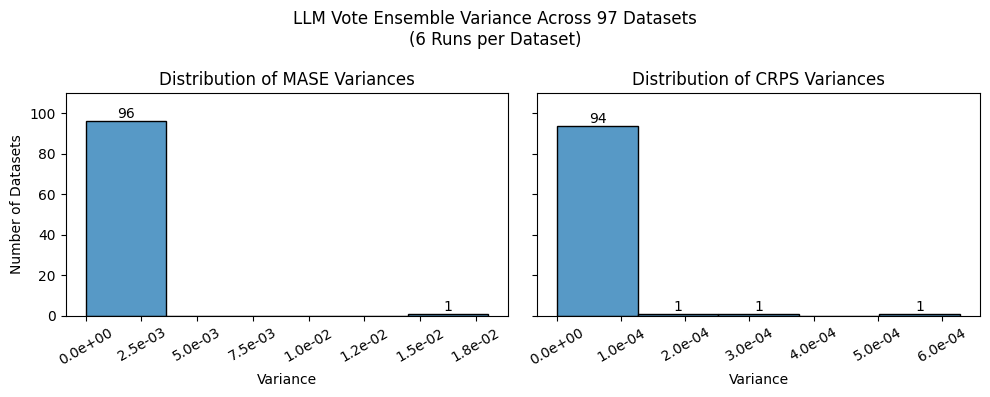

In [65]:
metrics = ["MASE", "CRPS"]
num_metrics = len(metrics)
fig, axes = plt.subplots(
    1,
    num_metrics,
    figsize=(5 * num_metrics, 4),
    sharey=True,
)

for ax, metric in zip(axes, metrics):
    sns.histplot(variance_df[metric], bins=5, ax=ax)
    ax.set_title(f"Distribution of {metric} Variances")
    ax.set_xlabel("Variance")
    ax.set_ylabel("Number of Datasets")
    ax.tick_params(axis="x", rotation=30)
    ax.xaxis.set_major_formatter(FormatStrFormatter("%.1e"))
    ax.set_ylim(0, 110)

    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            x = patch.get_x() + patch.get_width() / 2
            y = height
            ax.text(
                x,
                y,
                f"{int(height)}",
                ha="center",
                va="bottom",
                fontsize=10,
            )

plt.suptitle(
    f"LLM Vote Ensemble Variance Across {len(variance_df)} Datasets"
    f"\n({min_runs} Runs per Dataset)"
)
plt.tight_layout()
plt.show()